<a href="https://colab.research.google.com/github/PedroReste/producao_hospitalar_no_brasil/blob/main/producao_hospitalar_no_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importação e Verificação dos Dados


In [67]:
#Arrumando os dados para aparecerem com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [126]:
#Importando os dados
db = 'https://raw.githubusercontent.com/PedroReste/producao_hospitalar_no_brasil/main/Dados/producao_hospitalar_por_processamento_e_valor_total.csv'
db = pd.read_csv(db, encoding='ISO-8859-1', skiprows = 3, sep=';', skipfooter= 12, thousands='.', decimal=',')
db[['N', 'Estados']] = db['Unidade da Federação'].str.split(' ', n=1, expand=True)
db.drop(columns= 'N', inplace= True)
db.drop(columns= 'Unidade da Federação', inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,Total,Estados
0,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,14735061.31,13054440.15,12106427.42,9762335.30,11068276.73,10840980.86,10514614.33,10179147.12,1143762670.11,Rondônia
1,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4979239.30,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,496378498.39,Acre
2,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,3040801.51,2872635.38,3192051.90,2876263.83,3049820.67,2988371.19,2911575.67,1859781.42,1934688347.03,Amazonas
3,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3743330.65,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,368005513.44,Roraima
4,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,46325171.75,45116555.91,45771568.39,45027064.69,44530008.58,43753637.79,43065981.61,41200716.43,5220232381.68,Pará


In [127]:
db.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,Total,Estados
0,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,14735061.31,13054440.15,12106427.42,9762335.30,11068276.73,10840980.86,10514614.33,10179147.12,1143762670.11,Rondônia
1,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4979239.30,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,496378498.39,Acre
2,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,3040801.51,2872635.38,3192051.90,2876263.83,3049820.67,2988371.19,2911575.67,1859781.42,1934688347.03,Amazonas
3,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3743330.65,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,368005513.44,Roraima
4,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,46325171.75,45116555.91,45771568.39,45027064.69,44530008.58,43753637.79,43065981.61,41200716.43,5220232381.68,Pará


In [10]:
db.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,152125780.63,153107385.76,137549257.39,122943615.91,114704433.96,115169141.61,114399256.81,102332897.96,104962264.26,14177336638.25
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,34526664.72,31984745.11,36713343.08,33140371.78,23996334.39,24343257.72,22003059.87,21886082.43,23709509.16,2634865147.47
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,33338909.05,39215412.56,38962080.83,29287201.72,27855943.04,21487902.16,20245893.61,19745197.96,18149290.94,2497827005.94
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,64910778.00,72686178.78,72453553.63,67262247.67,58312298.08,43197488.99,44249364.82,44423904.35,38882545.69,5618918011.06
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,30629361.48,29662716.67,27288766.94,28509985.96,26207429.15,25147458.57,22742916.21,24945761.01,24404092.99,2901904274.70


In [23]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 172 entries, Unidade da Federação to Total
dtypes: float64(170), object(2)
memory usage: 36.4+ KB


In [ ]:
#Os dados descritivos assim não fizeram sentido
db.describe()

In [129]:
#Transformando a coluna de Unidades da Federação no index
index = db['Estados']
db.set_index(index, inplace= True)
db.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,Total,Estados
Estados,,,,,,,,,,,,,,,,,,,,,
Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,14735061.31,13054440.15,12106427.42,9762335.30,11068276.73,10840980.86,10514614.33,10179147.12,1143762670.11,Rondônia
Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4979239.30,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,496378498.39,Acre
Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,3040801.51,2872635.38,3192051.90,2876263.83,3049820.67,2988371.19,2911575.67,1859781.42,1934688347.03,Amazonas
Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3743330.65,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,368005513.44,Roraima
Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,46325171.75,45116555.91,45771568.39,45027064.69,44530008.58,43753637.79,43065981.61,41200716.43,5220232381.68,Pará


In [130]:
#Realizando um transposissão de matriz para montar um describe com base em cada estado ao invés de cada mês
descretivas = db.T.describe()
descretivas.T

,count,unique,top,freq
Estados,,,,
Rondônia,172.00,172.00,1388528.39,1.00
Acre,172.00,172.00,902416.00,1.00
Amazonas,172.00,172.00,4735529.42,1.00
Roraima,172.00,172.00,657889.53,1.00
Pará,172.00,172.00,18864744.11,1.00
Amapá,172.00,172.00,1120973.34,1.00
Tocantins,172.00,172.00,3441592.69,1.00
Maranhão,172.00,172.00,10723506.39,1.00
Piauí,172.00,172.00,7985142.43,1.00


In [131]:
db.sort_values('2008/Jan', ascending= False, inplace= True)

Text(0.5, 0, '')

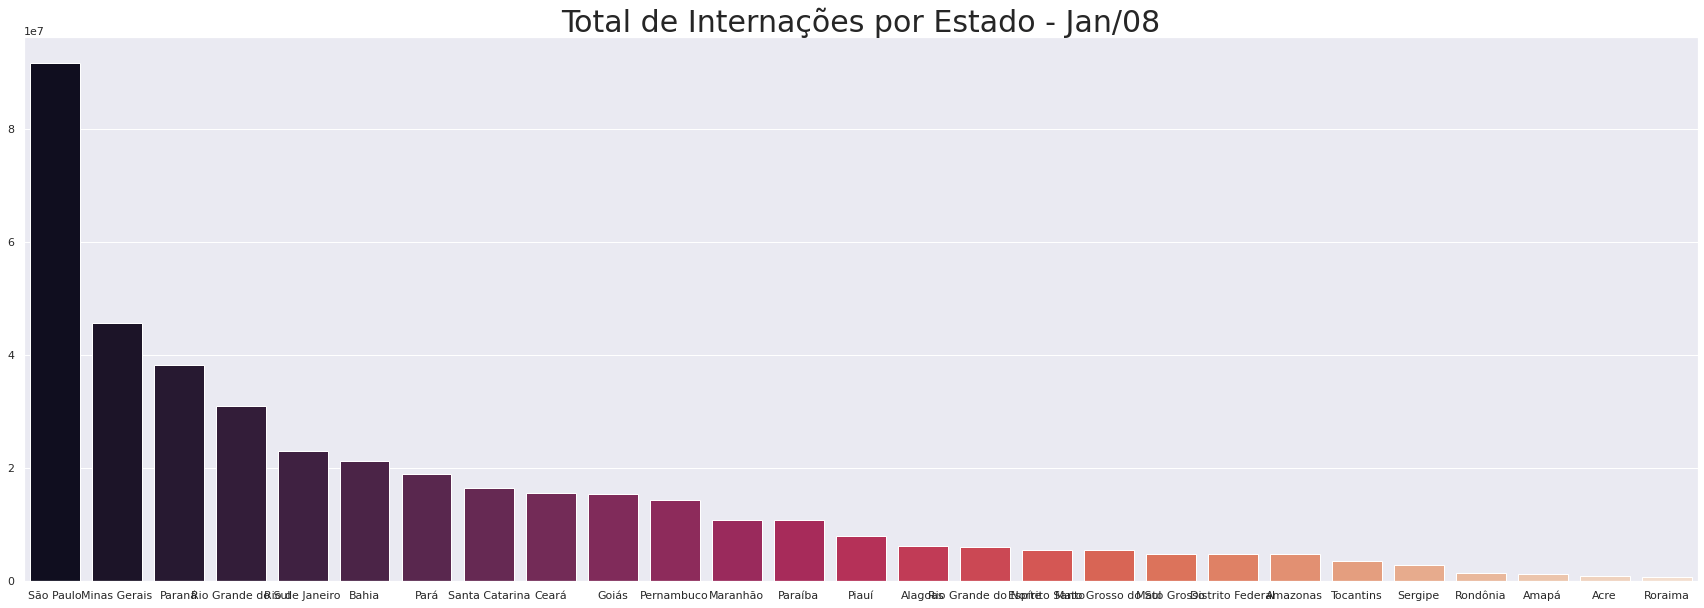

In [134]:
ax = plt.figure(figsize=(30,10))
ax = sns.barplot(data= db, y= '2008/Jan', x= 'Estados', palette="rocket")
ax = plt.title('Total de Internações por Estado - Jan/08', size= 30)
ax = plt.ylabel("")
ax = plt.xlabel("")
ax